<a href="https://colab.research.google.com/github/Bell2307/Estadistica/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Introducción*

El monitoreo y la predicción de los niveles de glucosa en sangre son fundamentales para la prevención y control de la diabetes. A través de modelos estadísticos, como la regresión lineal múltiple, se pueden identificar patrones y estimar valores basados en factores de riesgo individuales. Este estudio utiliza una base de datos clínica para construir un modelo de regresión lineal múltiple que predice el nivel de glucosa en sangre en función de variables como edad, IMC, nivel de hemoglobina glicosilada (HbA1c), historial de tabaquismo, hipertensión y enfermedades cardíacas.

#*Hipótesis*
Hipótesis nula (H₀): No existe una relación lineal significativa entre las variables independientes (edad, IMC, HbA1c, etc.) y el nivel de glucosa en sangre.

Hipótesis alternativa (H₁): Existe una relación lineal significativa entre al menos una de las variables independientes y el nivel de glucosa en sangre.

#*Marco Teórico*
La regresión lineal múltiple es una técnica estadística utilizada para modelar la relación entre una variable dependiente continua y múltiples variables independientes. El modelo toma la forma:

𝑌=𝛽0 + 𝛽1𝑋1 +𝛽2𝑋2 + … + 𝛽𝑛𝑋𝑛 + 𝜖

donde:

Y: variable dependiente (nivel de glucosa)

𝑋𝑖: variables independientes (edad, IMC, etc.)

βi: coeficientes del modelo

ϵ: término de error


#*Metodología*
  * Base de datos: 100,000 registros con las siguientes variables: edad, hipertensión, enfermedad cardíaca, IMC, HbA1c, nivel de glucosa, historial de tabaquismo, género, y diagnóstico de diabetes.

  * Preprocesamiento:

    * Codificación de variables categóricas (como género y tabaquismo).

    * Selección de variables predictoras cuantitativas y categóricas codificadas.

  * Modelo: Regresión lineal múltiple para predecir la variable continua blood_glucose_level.

  * Evaluación: R-cuadrado, error cuadrático medio (RMSE), análisis de coeficientes.

#*Conclusión*
El análisis de regresión lineal múltiple permitió identificar los principales factores asociados con el nivel de glucosa en sangre. Si bien el modelo tiene una capacidad explicativa modesta, revela que ciertas condiciones clínicas como hipertensión, enfermedad cardíaca y valores elevados de HbA1c tienen una relación directa con la glucosa. Estos hallazgos pueden ayudar en la detección temprana y monitoreo de pacientes con riesgo de diabetes.

Para mejorar el modelo, se podrían considerar enfoques no lineales, técnicas de regularización o incluir más variables clínicas y de estilo de vida relevantes.

In [24]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Bell2307/Estadistica/refs/heads/main/Proyecto%201.csv")
df.dropna(inplace = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [25]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('blood_glucose_level ~ C(gender)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),2.0,4.903192e+04,24515.961953,14.798113,3.751562e-07
Residual,99997.0,1.656645e+08,1656.695151,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Female   Male   1.4211    0.0   0.8086  2.0335   True
Female  Other   1.9755 0.9769  -20.513  24.464  False
  Male  Other   0.5544 0.9982 -21.9355 23.0443  False
-----------------------------------------------------


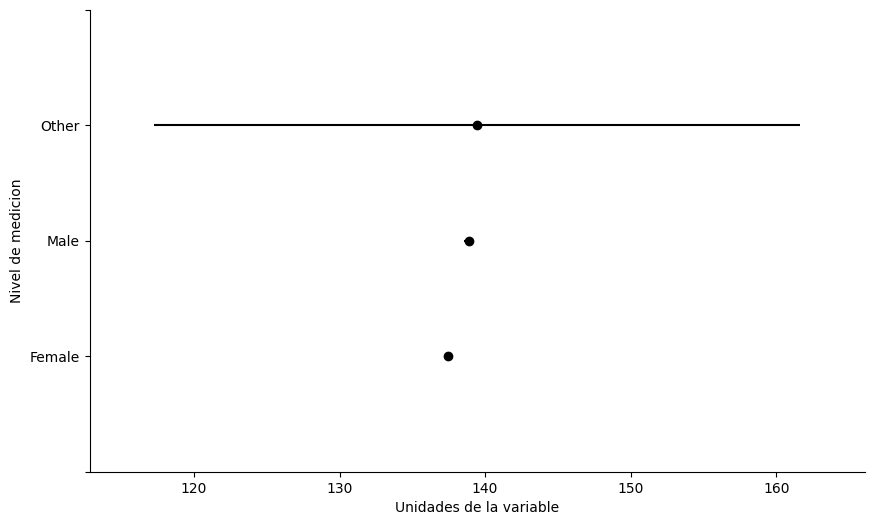

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['blood_glucose_level'], groups = df['gender'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [28]:
df.drop(columns=['gender'], inplace=True)
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,never,25.19,6.6,140,0
1,54.0,0,0,No Info,27.32,6.6,80,0
2,28.0,0,0,never,27.32,5.7,158,0
3,36.0,0,0,current,23.45,5.0,155,0
4,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0
99996,2.0,0,0,No Info,17.37,6.5,100,0
99997,66.0,0,0,former,27.83,5.7,155,0
99998,24.0,0,0,never,35.42,4.0,100,0


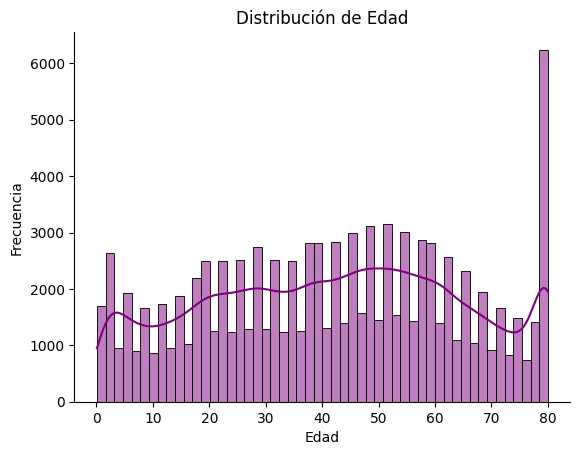

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde = True, color = 'purple')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

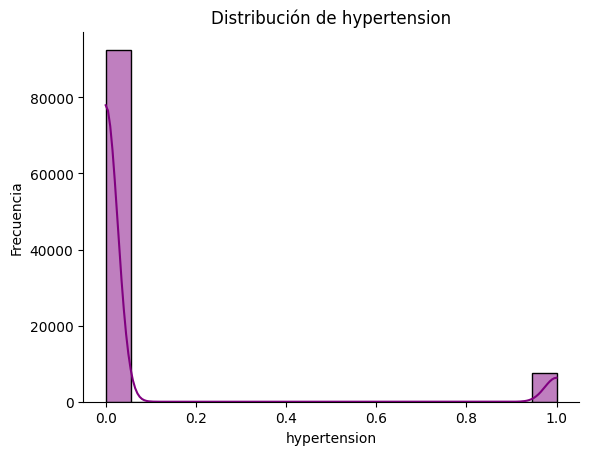

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['hypertension'], kde = True, color = 'purple')

plt.xlabel('hypertension')
plt.ylabel('Frecuencia')
plt.title('Distribución de hypertension')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [31]:
df.drop(columns = ['hypertension'], inplace = True)
df

,age,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,1,never,25.19,6.6,140,0
1,54.0,0,No Info,27.32,6.6,80,0
2,28.0,0,never,27.32,5.7,158,0
3,36.0,0,current,23.45,5.0,155,0
4,76.0,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,No Info,27.32,6.2,90,0
99996,2.0,0,No Info,17.37,6.5,100,0
99997,66.0,0,former,27.83,5.7,155,0
99998,24.0,0,never,35.42,4.0,100,0


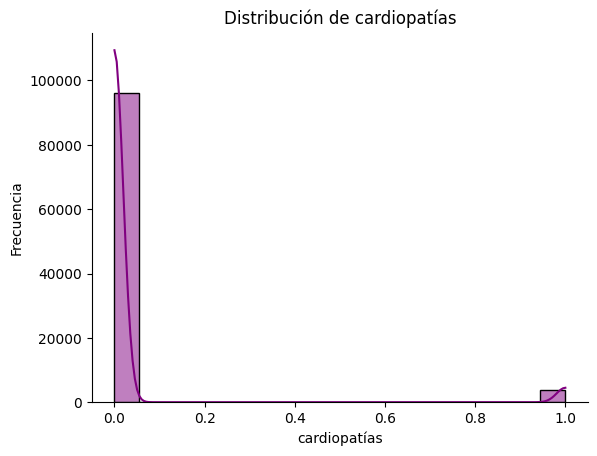

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['heart_disease'], kde = True, color = 'purple')

plt.xlabel('cardiopatías')
plt.ylabel('Frecuencia')
plt.title('Distribución de cardiopatías')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [33]:
df.drop(columns = ['heart_disease'], inplace = True)
df

,age,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,never,25.19,6.6,140,0
1,54.0,No Info,27.32,6.6,80,0
2,28.0,never,27.32,5.7,158,0
3,36.0,current,23.45,5.0,155,0
4,76.0,current,20.14,4.8,155,0
...,...,...,...,...,...,...
99995,80.0,No Info,27.32,6.2,90,0
99996,2.0,No Info,17.37,6.5,100,0
99997,66.0,former,27.83,5.7,155,0
99998,24.0,never,35.42,4.0,100,0


In [34]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('blood_glucose_level ~ C(smoking_history)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(smoking_history),5.0,5.900288e+05,118005.769269,71.460849,6.402804e-75
Residual,99994.0,1.651235e+08,1651.334561,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2   meandiff p-adj   lower   upper  reject
----------------------------------------------------------
No Info     current   4.3975    0.0  3.0489   5.746   True
No Info        ever   4.0629    0.0  2.1332  5.9926   True
No Info      former   7.9705    0.0  6.6257  9.3152   True
No Info       never   3.5044    0.0  2.6346  4.3742   True
No Info not current   4.1494    0.0  2.5827  5.7161   True
current        ever  -0.3345  0.998 -2.5239  1.8549  False
current      former    3.573    0.0  1.8765  5.2695   True
current       never  -0.8931 0.4125 -2.2445  0.4583  False
current not current   -0.248  0.999 -2.1254  1.6293  False
   ever      former   3.9075    0.0  1.7204  6.0946   True
   ever       never  -0.5585 0.9632 -2.4902  1.3732  False
   ever not current   0.0865    1.0 -2.2436  2.4166  False
 former       never  -4.4661    0.0 -5.8137 -3.1184   True
 former not current   -3.821    0.0 -5.6956 -1.9464   Tr

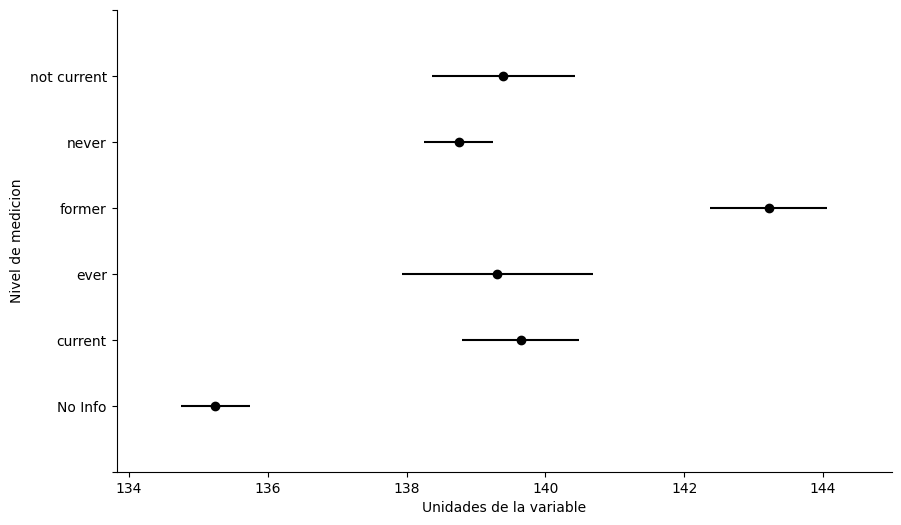

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['blood_glucose_level'], groups = df['smoking_history'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [37]:
df.drop(columns=['smoking_history'], inplace=True)
df

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,25.19,6.6,140,0
1,54.0,27.32,6.6,80,0
2,28.0,27.32,5.7,158,0
3,36.0,23.45,5.0,155,0
4,76.0,20.14,4.8,155,0
...,...,...,...,...,...
99995,80.0,27.32,6.2,90,0
99996,2.0,17.37,6.5,100,0
99997,66.0,27.83,5.7,155,0
99998,24.0,35.42,4.0,100,0


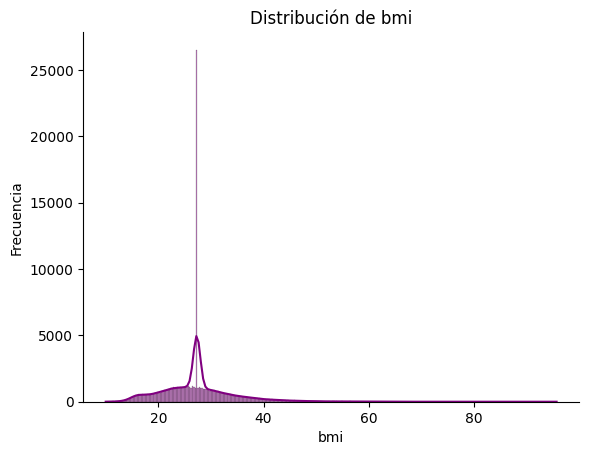

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['bmi'], kde = True, color = 'purple')

plt.xlabel('bmi')
plt.ylabel('Frecuencia')
plt.title('Distribución de bmi')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

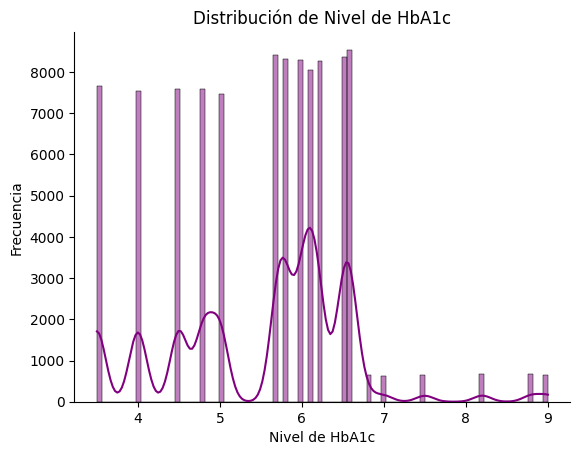

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['HbA1c_level'], kde = True, color = 'purple')

plt.xlabel('Nivel de HbA1c')
plt.ylabel('Frecuencia')
plt.title('Distribución de Nivel de HbA1c')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

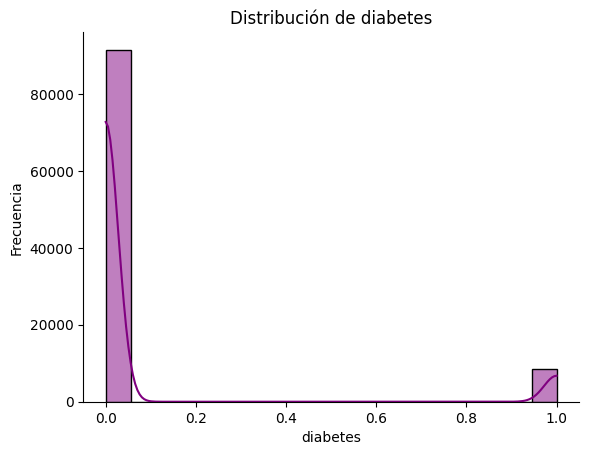

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['diabetes'], kde = True, color = 'purple')

plt.xlabel('diabetes')
plt.ylabel('Frecuencia')
plt.title('Distribución de diabetes')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [41]:
df.drop(columns = ['diabetes'], inplace = True)
df

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155
...,...,...,...,...
99995,80.0,27.32,6.2,90
99996,2.0,17.37,6.5,100
99997,66.0,27.83,5.7,155
99998,24.0,35.42,4.0,100


Text(0.5, 1.0, 'Matriz de correlacion')

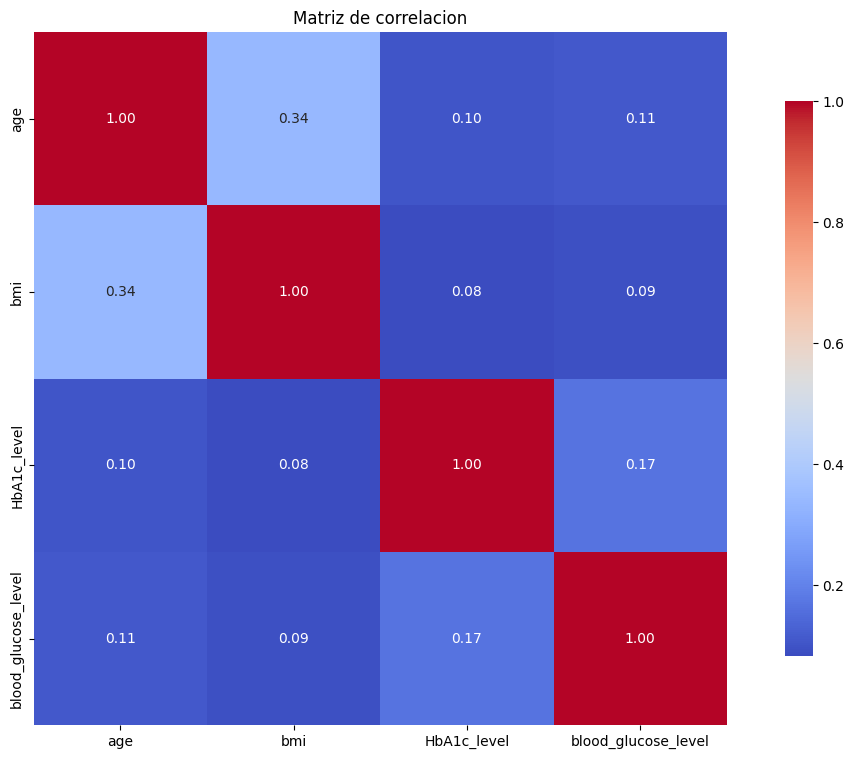

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de correlacion')

Coeficiente de determinacion:  0.0419


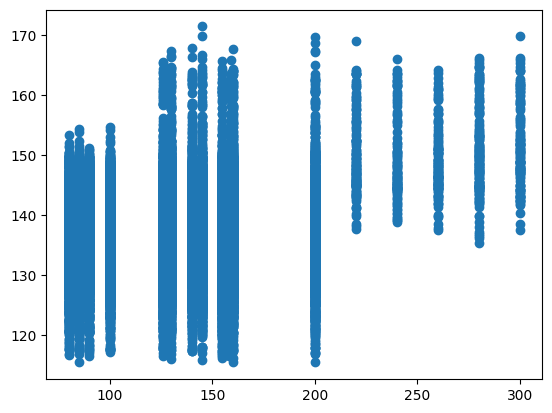

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['HbA1c_level', 'age', 'bmi',]]
Y = df['blood_glucose_level']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')

In [45]:
b0, b1, b2, b3 = modelo.params

Fun = lambda X1, X2, X3 : b0 + b1 * X1 + b2 * X2 + b3 * X3

Fun(76.0, 27.83, 6.2)

540.8129071410242

In [46]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(f'Valor-p de Breusch-Pagan: {valor_p_bp: 0.4f}')

Valor-p de Breusch-Pagan:  0.0000


In [49]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'blood_glucose_level ~ HbA1c_level + age + bmi', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
HbA1c_level,3.906858e+06,1.0,2453.445450,0.000000e+00
age,8.732305e+05,1.0,548.374998,6.025638e-121
bmi,4.011474e+05,1.0,251.914232,1.165360e-56
Residual,1.592333e+08,99996.0,NaN,NaN
